In [110]:
import os
import numpy
import pathlib
import toml
from matplotlib import pyplot

In [111]:
simpath = pathlib.Path(os.path.expandvars('$GROUP_FOLDER/home-folder/reinhardt/simruns/2019-11-27'))

In [112]:
simpath

PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27')

In [113]:
list(simpath.glob('run*'))

[PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S10.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.5k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S0.1k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S5.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S20.0k'),
 PosixPath('/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/run_S1.0k')]

In [136]:
def load_run(path):
    path = pathlib.Path(path)
    info = toml.load(path / 'info.toml')
    mut_inf = numpy.load(path / 'mutual_information.npz')
    data = {}
    for key, val in mut_inf.items():
        data[key] = numpy.mean(val, axis=0)
    return {'info': info, 'data': data}

In [141]:
#simulation_results = [load_run(path) for path in simpath.glob('run*')]
simulation_results = [load_run(pathlib.Path.home() / 'testrun4')]

In [142]:
simulation_results

[{'info': {'num_signals': 2500,
   'num_responses': 150,
   'num_processes': 8,
   'output': '/home/ipausers/reinhardt/testrun4',
   'signal_path': '/home/ipausers/reinhardt/test_signal.npz',
   'distribution_path': '/home/ipausers/reinhardt/test_distribution.npy',
   'description': 'This is the default configuration. The description is not read or modified in any way\nand you can use it for any information you want to store with your results.\n',
   'kde_estimate': {'size': 15000,
    'signal': {'length': 4000, 'initial': 50},
    'response': {'initial': 50}},
   'signal': {'length': 50000,
    'components': ['S'],
    'reactions': [{'k': 0.25, 'reactants': [], 'products': ['S']},
     {'k': 0.005, 'reactants': ['S'], 'products': []}]},
   'response': {'length': 50000,
    'components': ['X'],
    'reactions': [{'k': 0.01, 'reactants': ['S'], 'products': ['S', 'X']},
     {'k': 0.01, 'reactants': ['X'], 'products': []}]},
   'run': {'started': datetime.datetime(2019, 12, 3, 15, 53, 25

In [143]:
numerical_x = numpy.array([6.10351562e-01, 1.22070312e+00, 2.44140625e+00, 4.88281250e+00,
       9.76562500e+00, 1.95312500e+01, 3.90625000e+01, 7.81250000e+01,
       1.56250000e+02, 3.12500000e+02, 6.25000000e+02, 1.25000000e+03,
       2.50000000e+03])
numerical = numpy.array([0.07155042, 0.07221034, 0.07352942, 0.07616464, 0.08142376,
       0.09190024, 0.1127109 , 0.15391634, 0.23541893, 0.39725253,
       0.72029812, 1.36630923, 2.65833046])

In [144]:
numerical_x = numpy.array([  3.2       ,   4.75518173,   7.06617289,  10.50029256,
         15.60337477,  23.18652581,  34.45504493,  51.2       ,
         76.0829076 , 113.0587662 , 168.00468091, 249.65399638,
        370.98441288, 551.2807189 , 819.2       ])
numerical = numpy.array([0.16057347, 0.16313811, 0.16753439, 0.17376199, 0.18328551,
        0.19683625, 0.21770779, 0.24809272, 0.29384163, 0.36153363,
        0.46213797, 0.61138198, 0.83304402, 1.1629737 , 1.65274695])

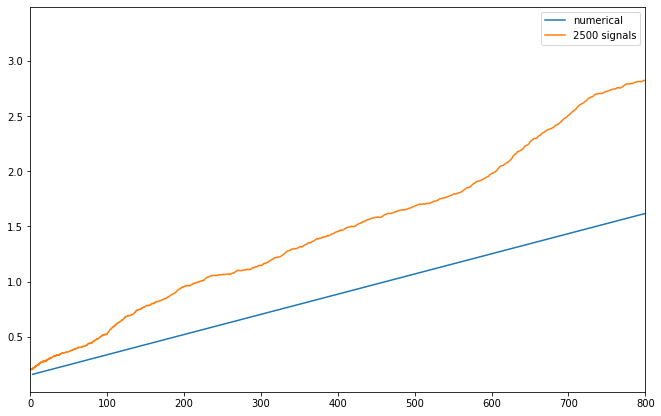

In [145]:
pyplot.plot(numerical_x, numerical, label='numerical')

for res in sorted(simulation_results, key=lambda x: x['info']['num_signals']):
    pyplot.plot(res['data']['trajectory_length'], res['data']['mutual_information'], label=f"{res['info']['num_signals']} signals")


pyplot.legend();
pyplot.xlim(0,800)
pyplot.savefig('signals.pdf')
pyplot.gcf().set_size_inches(28/2.54, 18/2.54);

In [133]:
mi = simulation_results[0]['data']['mutual_information']
mi_x = simulation_results[0]['data']['trajectory_length']
(numerical[-1] - numerical[0]) / (numerical_x[-1] - numerical_x[0]), (mi[-1] - mi[0]) / (mi_x[-1] - mi_x[0])

(0.0018286439705882352, 0.003163656010333835)

In [135]:
numpy.log(1/0.0018286439705882352 * 0.003163656010333835)

0.5481536316269594

(-0.05, 0.05)

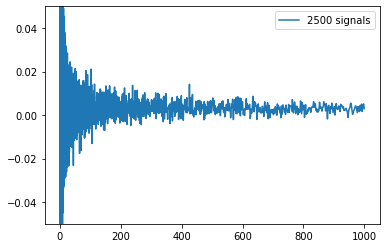

In [109]:
for res in simulation_results:
    t = res['data']['trajectory_length']
    pyplot.plot(t[1:], numpy.diff(res['data']['mutual_information']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")
    #pyplot.plot(t[1:], numpy.diff(res['data']['conditional_entropy']) / numpy.diff(t), label=f"{res['info']['num_signals']} signals")

pyplot.legend()
pyplot.ylim(-0.05,0.05)

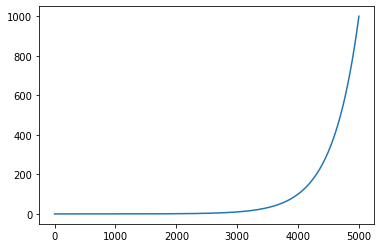

In [108]:
t = simulation_results[0]['data']['trajectory_length']
pyplot.plot(numpy.arange(t.size), t);

In [105]:
points = numpy.load(simpath / 'distribution_20k.npy')
pyplot.scatter(x=points.T[0], y=points.T[1])

FileNotFoundError: [Errno 2] No such file or directory: '/run/user/357100522/gvfs/smb-share:server=sun.amolf.nl,share=tenwolde/home-folder/reinhardt/simruns/2019-11-27/distribution_20k.npy'

In [65]:
points.shape

(20000, 2)

In [66]:
from scipy.stats import gaussian_kde

joint_estimate = gaussian_kde(points.T)
sig_estimate = gaussian_kde(points.T[0])
res_estimate = gaussian_kde(points.T[1])

In [68]:
points = joint_estimate.resample(19999)
p_zero = joint_estimate.logpdf(points) - sig_estimate.logpdf(points[0]) - res_estimate.logpdf(points[1])
numpy.mean(p_zero), numpy.std(p_zero)

(0.07244385492911486, 0.3712414643963079)